# Incidental learning of rewarded associations bolsters learning on an associative task

Reward has been shown to change behavior as a result of incentive learning (by motivating the individual to increase their effort) and instrumental learning (by increasing the frequency of a particular behavior). However, Palminteri et al. (2011) demonstrated that reward can also improve the incidental learning of a motor skill even when participants are unaware of the relationship between the reward and the motor act. Nonetheless, it remains unknown whether these effects of reward are the indirect results of manipulations of top–down factors. To identify the locus of the benefit associated with rewarded incidental learning, we used a chord-learning task (Seibel, 1963) in which the correct performance of some chords was consistently rewarded with points necessary to complete the block whereas the correct performance of other chords was not rewarded. Following training, participants performed a transfer phase without reward and then answered a questionnaire to assess explicit awareness about the rewards. Experiment 1 revealed that rewarded chords were performed more quickly than unrewarded chords, and there was little awareness about the relationship between chords and reward. Experiment 2 obtained similar findings with simplified responses to show that the advantage for rewarded stimulus combinations reflected more efficient binding of stimulus–response (S-R) associations, rather than a response bias for rewarded associations or improved motor learning. These results indicate that rewards can be used to significantly improve the learning of S-R associations without directly manipulating top–down factors. (PsycINFO Database Record (c) 2016 APA, all rights reserved)



## Importing Libraries

In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Library to help with statistical analysis
import scipy.stats as stats

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Reading the Data into a DataFrame

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DataScience/Incidental_Rewarded_Learning/Incidental_Rewarded_Learning.csv')
df_nr = df.copy()
df_nr.drop(df[df['Subject'] == 27].index, inplace=True) # Remove subject 27
df_nr.drop(df[df['Group'] == 2].index, inplace=True) # Only analyze Group 1

### Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [ ]:
# First five rows
df_nr.head()

,Subject,Sex,Group,Rmapping,CB,RTL,RTR,RTMax,Asynchrony,AccL,...,AfterReward,Practiced,PrevAcc,GoodFast,Repeats,Useable,Qchord,QRecall,QRespQ,Composite Awareness
0,1,2.0,1,1,1,2419.0,40.0,2419.0,NaN,1.0,...,0.0,0.0,0,0,0,0,NaN,NaN,0,1.0
1,1,2.0,1,1,1,3579.0,40.0,3579.0,3539,1.0,...,0.0,0.0,0,0,0,0,NaN,NaN,0,1.0
2,1,2.0,1,1,1,2464.0,2486.0,2486.0,22,1.0,...,0.0,1.0,0,0,0,0,NaN,NaN,0,1.0
3,1,2.0,1,1,1,2192.0,2198.0,2198.0,6,1.0,...,0.0,1.0,1,0,0,0,NaN,NaN,0,1.0
4,1,2.0,1,1,1,3328.0,40.0,3328.0,3288,1.0,...,1.0,1.0,1,0,0,0,NaN,NaN,0,1.0


In [ ]:
# Last five rows
df_nr.tail()

,Subject,Sex,Group,Rmapping,CB,RTL,RTR,RTMax,Asynchrony,AccL,...,AfterReward,Practiced,PrevAcc,GoodFast,Repeats,Useable,Qchord,QRecall,QRespQ,Composite Awareness
34409,91,1.0,1,4,7,NaN,NaN,NaN,#VALUE!,NaN,...,NaN,NaN,0,0,1,0,71.0,0.0,n,0.625
34410,91,1.0,1,4,7,NaN,NaN,NaN,#VALUE!,NaN,...,NaN,NaN,0,0,1,0,72.0,1.0,n,0.625
34411,91,1.0,1,4,7,NaN,NaN,NaN,#VALUE!,NaN,...,NaN,NaN,0,0,1,0,83.0,0.0,y,0.625
34412,91,1.0,1,4,7,NaN,NaN,NaN,#VALUE!,NaN,...,NaN,NaN,0,0,1,0,64.0,1.0,n,0.625
34413,91,1.0,1,4,7,NaN,NaN,NaN,#VALUE!,NaN,...,NaN,NaN,0,0,1,0,84.0,1.0,y,0.625


In [ ]:
# Data frame shape
print("There are ", df_nr.shape[0], " rows and ", df_nr.shape[1], " columns in the dataset.")

There are  16682  rows and  36  columns in the dataset.


In [ ]:
# Data frame information
df_nr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16682 entries, 0 to 34413
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Subject              16682 non-null  int64  
 1   Sex                  16682 non-null  float64
 2   Group                16682 non-null  int64  
 3   Rmapping             16682 non-null  int64  
 4   CB                   16682 non-null  int64  
 5   RTL                  16426 non-null  float64
 6   RTR                  16426 non-null  float64
 7   RTMax                16426 non-null  float64
 8   Asynchrony           16457 non-null  object 
 9   AccL                 16426 non-null  float64
 10  AccR                 16426 non-null  float64
 11  Bacc                 16682 non-null  int64  
 12  Block                16682 non-null  int64  
 13  Trial                16682 non-null  int64  
 14   F1                  16682 non-null  object 
 15  Face2                16682 non-null  obje

In [ ]:
# Statistical summary
df_nr.describe().T

,count,mean,std,min,25%,50%,75%,max
Subject,16682.0,34.280722,22.648131,1.000,12.000,35.00,50.00,91.000
Sex,16682.0,1.497662,0.500010,1.000,1.000,1.00,2.00,2.000
Group,16682.0,1.000000,0.000000,1.000,1.000,1.00,1.00,1.000
Rmapping,16682.0,2.483815,1.119397,1.000,1.000,2.00,3.00,4.000
CB,16682.0,4.548076,2.297985,1.000,3.000,5.00,7.00,8.000
RTL,16426.0,1318.872337,464.770114,0.000,1052.000,1269.00,1536.00,22998.000
RTR,16426.0,1256.758858,440.594657,40.000,1047.000,1258.00,1506.75,2997.000
RTMax,16426.0,1354.980153,457.845263,40.000,1091.000,1300.00,1568.00,22998.000
AccL,16426.0,0.926336,0.261231,0.000,1.000,1.00,1.00,1.000
AccR,16426.0,0.870754,0.335483,0.000,1.000,1.00,1.00,1.000


In [ ]:
# Check for null values
print(df_nr.isnull().sum())
print("There are", df_nr.isnull().sum().sum(), "null values.") # No null values

Subject                    0
Sex                        0
Group                      0
Rmapping                   0
CB                         0
RTL                      256
RTR                      256
RTMax                    256
Asynchrony               225
AccL                     256
AccR                     256
Bacc                       0
Block                      0
Trial                      0
 F1                        0
Face2                      0
R1                       256
R2                       256
Chord                    256
CResp1                     0
CResp2                     0
RewardType               256
ChordType                256
Rewarded                   0
Code                       0
PrevReward                 0
AfterReward              255
Practiced                256
PrevAcc                    0
GoodFast                   0
Repeats                    0
Useable                    0
Qchord                 16426
QRecall                16426
QRespQ        

In [ ]:
# Check for duplicated rows
print("There are", df_nr.duplicated().sum(), "duplicated rows.") # No duplicate rows

There are 0 duplicated rows.


## Training - RT

In [ ]:
# Only include blocks 2-9
Training_df = df_nr[(df_nr['Block'] <= 9) & (df_nr['Block'] >= 2)]

In [ ]:
# Clean data
Training_df_clean_RT = Training_df[(Training_df['Bacc'] == 1) & (Training_df['PrevAcc'] == 1) & (Training_df['GoodFast'] == 1) & (Training_df['Repeats'] == 0)];

In [ ]:
# Create data sets for rewarded and unrewarded RTs
Reward_train_m_rt = Training_df_clean_RT[Training_df_clean_RT['RewardType'] == "R"].groupby('Block')['RTMax'].mean()
NoReward_train_m_rt = Training_df_clean_RT[Training_df_clean_RT['RewardType'] == "U"].groupby('Block')['RTMax'].mean()
Reward_train_s_rt = Training_df_clean_RT[Training_df_clean_RT['RewardType'] == "R"].groupby('Block')['RTMax'].std()
NoReward_train_s_rt = Training_df_clean_RT[Training_df_clean_RT['RewardType'] == "U"].groupby('Block')['RTMax'].std()
R_sem_train_rt = Reward_train_s_rt / np.sqrt(df_nr['Subject'].unique().size)
NR_sem_train_rt = NoReward_train_s_rt / np.sqrt(df_nr['Subject'].unique().size)

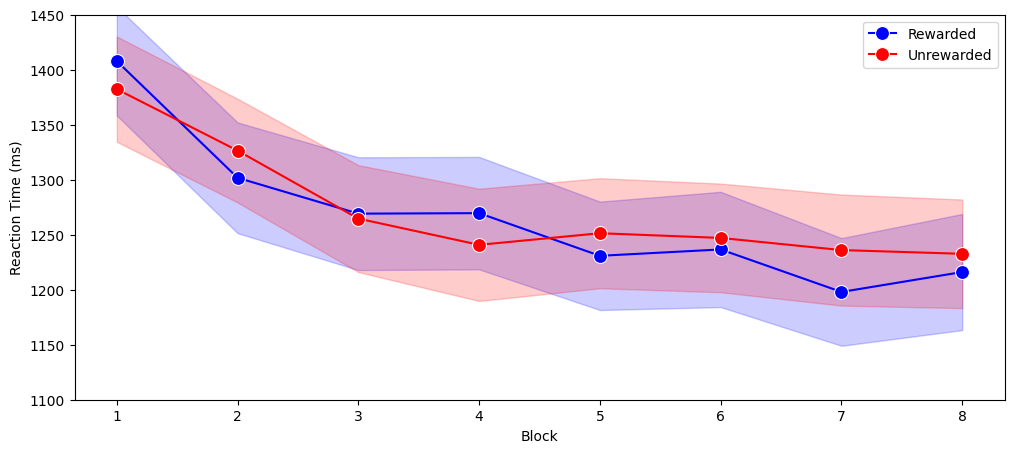

In [ ]:
# Training data (RT) Plot
Training_plot_RT_df = pd.DataFrame({'Block': np.arange(1,9,1), 'Rewarded': Reward_train_m_rt, 'Unrewarded': NoReward_train_m_rt})

plt.figure(figsize=(12,5))
# Multiple lines with hue
sns.lineplot(x='Block',
             y='Rewarded',
             data=Training_plot_RT_df,
             label='Rewarded',
             marker='o',
             markersize=10,
             markerfacecolor='Blue',
             color='Blue',
             linestyle='-'
);

sns.lineplot(x='Block',
             y='Unrewarded',
             data=Training_plot_RT_df,
             label='Unrewarded',
             marker='o',
             markersize=10,
             markerfacecolor='Red',
             color='Red',
             linestyle='-'
);

# Shaded error bars
plt.fill_between(np.arange(1,9,1), Reward_train_m_rt - R_sem_train_rt, Reward_train_m_rt + R_sem_train_rt, color='b', alpha=0.2);
plt.fill_between(np.arange(1,9,1), NoReward_train_m_rt - NR_sem_train_rt, NoReward_train_m_rt + NR_sem_train_rt, color='r', alpha=0.2);
plt.xlabel('Block');
plt.ylabel('Reaction Time (ms)');
plt.ylim(1100, 1450);

## Training - Accuracy

In [ ]:
# Create data set for accuracy training data
Training_df_clean_Acc = Training_df[(Training_df['PrevAcc'] == 1) & (Training_df['GoodFast'] == 1) & (Training_df['Repeats'] == 0)];

In [ ]:
# Create data sets for rewarded and unrewarded Accs
Reward_train_m_acc = Training_df_clean_Acc[Training_df_clean_Acc['RewardType'] == "R"].groupby('Block')['Bacc'].mean()
NoReward_train_m_acc = Training_df_clean_Acc[Training_df_clean_Acc['RewardType'] == "U"].groupby('Block')['Bacc'].mean()
Reward_train_s_acc = Training_df_clean_Acc[Training_df_clean_Acc['RewardType'] == "R"].groupby('Block')['Bacc'].std()
NoReward_train_s_acc = Training_df_clean_Acc[Training_df_clean_Acc['RewardType'] == "U"].groupby('Block')['Bacc'].std()
R_sem_train_acc = NoReward_train_s_acc / np.sqrt(df_nr['Subject'].unique().size)
NR_sem_train_acc = NoReward_train_s_acc / np.sqrt(df_nr['Subject'].unique().size)

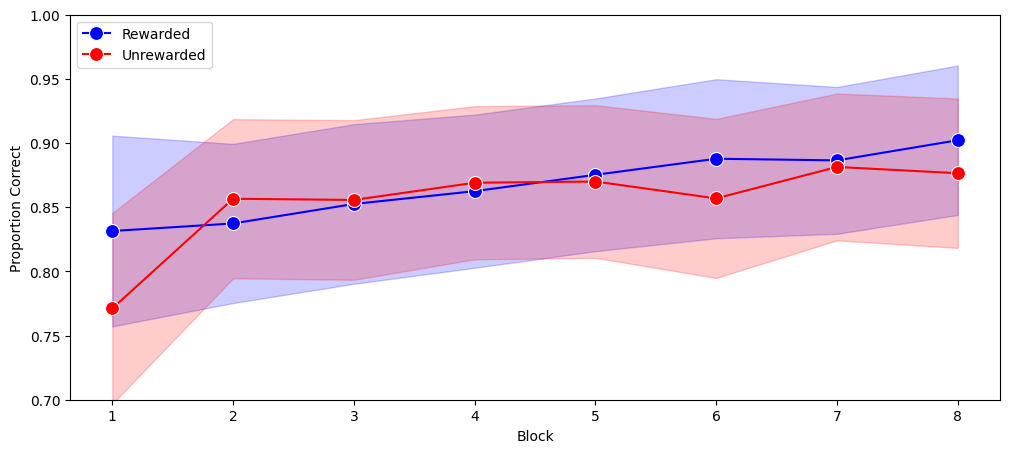

In [ ]:
# Training data (RT) Plot
Training_plot_Acc_df = pd.DataFrame({'Block': np.arange(1,9,1), 'Rewarded': Reward_train_m_acc, 'Unrewarded': NoReward_train_m_acc})

plt.figure(figsize=(12,5))
# Multiple lines with hue
sns.lineplot(x='Block',
             y='Rewarded',
             data=Training_plot_Acc_df,
             label='Rewarded',
             marker='o',
             markersize=10,
             markerfacecolor='Blue',
             color='Blue',
             linestyle='-'
);

sns.lineplot(x='Block',
             y='Unrewarded',
             data=Training_plot_Acc_df,
             label='Unrewarded',
             marker='o',
             markersize=10,
             markerfacecolor='Red',
             color='Red',
             linestyle='-'
);

# Shaded error bars
plt.fill_between(np.arange(1,9,1), Reward_train_m_acc - R_sem_train_acc, Reward_train_m_acc + R_sem_train_acc, color='b', alpha=0.2);
plt.fill_between(np.arange(1,9,1), NoReward_train_m_acc - NR_sem_train_acc, NoReward_train_m_acc + NR_sem_train_acc, color='r', alpha=0.2);
plt.xlabel('Block');
plt.ylabel('Proportion Correct');
plt.ylim(0.70, 1);

### After Rewarded RT

In [ ]:
# Create data sets for rewarded and unrewarded RTs
Reward_after_m_rt = Training_df_clean_RT[Training_df_clean_RT['AfterReward'] == 1].groupby('Block')['RTMax'].mean()
NoReward_after_m_rt = Training_df_clean_RT[Training_df_clean_RT['AfterReward'] == 0].groupby('Block')['RTMax'].mean()
Reward_after_s_rt = Training_df_clean_RT[Training_df_clean_RT['AfterReward'] == 1].groupby('Block')['RTMax'].std()
NoReward_after_s_rt = Training_df_clean_RT[Training_df_clean_RT['AfterReward'] == 0].groupby('Block')['RTMax'].std()
R_after_sem = Reward_after_s_rt / np.sqrt(df_nr['Subject'].unique().size)
NR_after_sem = NoReward_after_s_rt / np.sqrt(df_nr['Subject'].unique().size)

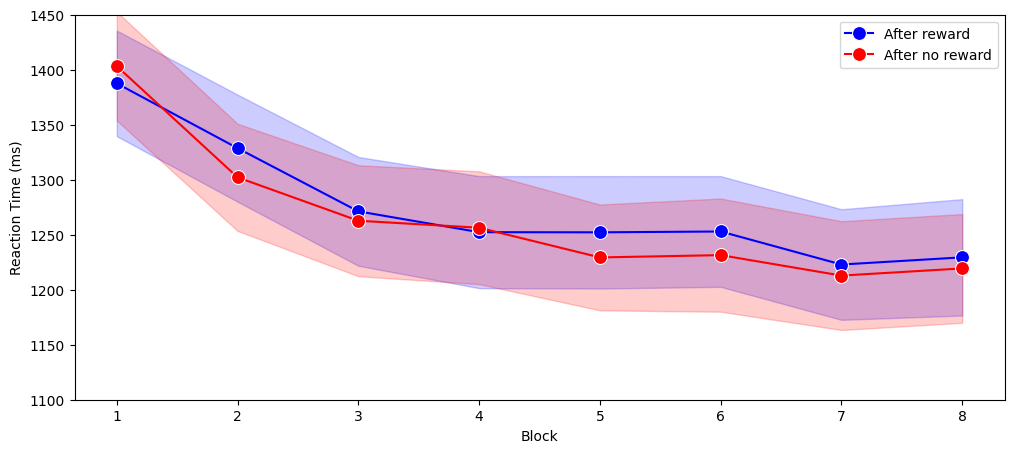

In [ ]:
# Training data (RT) Plot
Training_plot_RT_after = pd.DataFrame({'Block': np.arange(1,9,1), 'Rewarded': Reward_after_m_rt, 'Unrewarded': NoReward_after_m_rt})

plt.figure(figsize=(12,5))
# Multiple lines with hue
sns.lineplot(x='Block',
             y='Rewarded',
             data=Training_plot_RT_after,
             label='After reward',
             marker='o',
             markersize=10,
             markerfacecolor='Blue',
             color='Blue',
             linestyle='-'
);

sns.lineplot(x='Block',
             y='Unrewarded',
             data=Training_plot_RT_after,
             label='After no reward',
             marker='o',
             markersize=10,
             markerfacecolor='Red',
             color='Red',
             linestyle='-'
);

# Shaded error bars
plt.fill_between(np.arange(1,9,1), Reward_after_m_rt - R_after_sem, Reward_after_m_rt + R_after_sem, color='b', alpha=0.2);
plt.fill_between(np.arange(1,9,1), NoReward_after_m_rt - NR_after_sem, NoReward_after_m_rt + NR_after_sem, color='r', alpha=0.2);
plt.xlabel('Block');
plt.ylabel('Reaction Time (ms)');
plt.ylim(1100, 1450);

### After Reward Acc

In [ ]:
# Create data sets for rewarded and unrewarded Acc
Reward_after_m_acc = Training_df_clean_Acc[Training_df_clean_Acc['AfterReward'] == 1].groupby('Block')['Bacc'].mean()
NoReward_after_m_acc = Training_df_clean_Acc[Training_df_clean_Acc['AfterReward'] == 0].groupby('Block')['Bacc'].mean()
Reward_after_s_acc = Training_df_clean_Acc[Training_df_clean_Acc['AfterReward'] == 1].groupby('Block')['Bacc'].std()
NoReward_after_s_acc = Training_df_clean_Acc[Training_df_clean_Acc['AfterReward'] == 0].groupby('Block')['Bacc'].std()
R_after_sem_acc = Reward_after_s_acc / np.sqrt(df_nr['Subject'].unique().size)
NR_after_sem_acc = NoReward_after_s_acc / np.sqrt(df_nr['Subject'].unique().size)

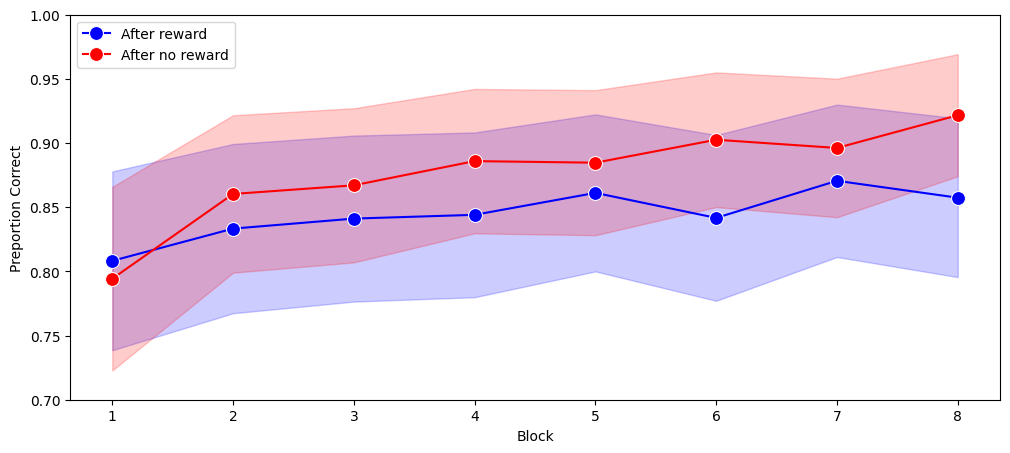

In [ ]:
# Training data (Acc) Plot
Training_plot_Acc_after = pd.DataFrame({'Block': np.arange(1,9,1), 'Rewarded': Reward_after_m_acc, 'Unrewarded': NoReward_after_m_acc})

plt.figure(figsize=(12,5))
# Multiple lines with hue
sns.lineplot(x='Block',
             y='Rewarded',
             data=Training_plot_Acc_after,
             label='After reward',
             marker='o',
             markersize=10,
             markerfacecolor='Blue',
             color='Blue',
             linestyle='-'
);

sns.lineplot(x='Block',
             y='Unrewarded',
             data=Training_plot_Acc_after,
             label='After no reward',
             marker='o',
             markersize=10,
             markerfacecolor='Red',
             color='Red',
             linestyle='-'
);

# Shaded error bars
plt.fill_between(np.arange(1,9,1), Reward_after_m_acc - R_after_sem_acc, Reward_after_m_acc + R_after_sem_acc, color='b', alpha=0.2);
plt.fill_between(np.arange(1,9,1), NoReward_after_m_acc - NR_after_sem_acc, NoReward_after_m_acc + NR_after_sem_acc, color='r', alpha=0.2);
plt.xlabel('Block');
plt.ylabel('Preportion Correct');
plt.ylim(0.7, 1);

## Transfer RT

In [ ]:
# Only include block 10 and clean data
Transfer_df = df_nr[(df_nr['Block'] == 10)]
Transfer_df_clean_RT =Transfer_df[(Transfer_df['GoodFast'] == 1) & (Transfer_df['Bacc'] == 1)];

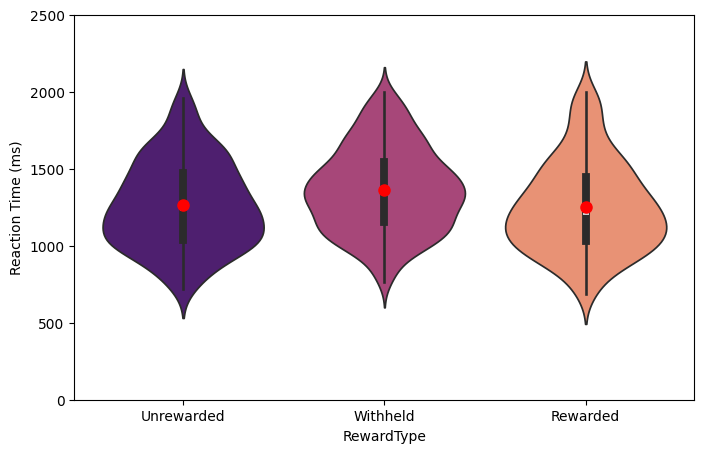

In [ ]:
# Create data sets for rewarded and unrewarded RTs
plt.figure(figsize=(8,5))
ax = sns.violinplot(x='RewardType', y='RTMax', hue = 'RewardType',data=Transfer_df_clean_RT, palette='magma');
#ax.set_xticklabels(['Unrewarded', 'Withheld', 'Rewarded']);
Mns = Transfer_df_clean_RT.groupby('RewardType')['RTMax'].mean()
# Calculate and plot means
means = Transfer_df_clean_RT.groupby('RewardType')['RTMax'].mean()

# Reorder means
means = means.reindex(['U', 'W','R'])

for i, mean in enumerate(means):
    ax.plot(i, mean, marker='o', color='red', markersize=8)

ax.set_xticks([0, 1, 2]);
ax.set_xticklabels(["Unrewarded", "Withheld", "Rewarded"])
ax.set_ylabel('Reaction Time (ms)');
plt.ylim(0,2500);

In [ ]:
# Determine whether normality assumption is valid

#### Assumption 1: Normality
from scipy import stats

#### find the p-value of the Shapiro-Wilks test
w_shapiro_transfer_rt, p_value_shapiro_transfer_rt = stats.shapiro(Transfer_df_clean_RT['RTMax'])
print('Because the p-value is ', round(p_value_shapiro_transfer_rt,8),"...", sep = '')

if p_value_shapiro_transfer_rt < 0.05:
  print("We reject the null hypothesis that RTMax data are normally distributed.")
else:
  print('We fail the reject the null hypothesis that RTMax data are normally distributed.')

Because the p-value is 2e-08...
We reject the null hypothesis that RTMax data are normally distributed.


In [ ]:
# Determine whether homogeneity of variances assumption is valid

#### Assumption 2: Homogeneity of Variance
from scipy.stats import levene
statistic_levenes_transfer_rt, p_value_levenes_transfer_RT = levene( Transfer_df_clean_RT['RTMax'][Transfer_df_clean_RT['RewardType']=="U"],
                                                                     Transfer_df_clean_RT['RTMax'][Transfer_df_clean_RT['RewardType']=="W"],
                                                                     Transfer_df_clean_RT['RTMax'][Transfer_df_clean_RT['RewardType']=="R"]);
#### find the p-value of Levene's test
print('Because the p-value is ', round(p_value_levenes_transfer_RT,4),"...", sep = '')

if p_value_levenes_transfer_RT < 0.05:
  print("We reject the null hypothesis that the population variances are equal between reward types.")
else:
  print('We fail to reject the null hypothesis that the population variances are equal between reward types.')

Because the p-value is 0.6533...
We fail to reject the null hypothesis that the population variances are equal between reward types.


In [ ]:
# Significance testing using one-way ANOVA

from scipy.stats import f_oneway

reward = Transfer_df_clean_RT['RTMax'][Transfer_df_clean_RT['RewardType']=="R"]
unreward = Transfer_df_clean_RT['RTMax'][Transfer_df_clean_RT['RewardType']=="U"]
withheld = Transfer_df_clean_RT['RTMax'][Transfer_df_clean_RT['RewardType']=="W"]

# calculate the p-value using the one-way ANOVA test
anova_f_transfer_rt, anova_p_transfer_rt = f_oneway(reward, unreward, withheld)
print("The F-statistic is ", round(anova_f_transfer_rt,3), " and the p-value is ", round(anova_p_transfer_rt,8),".",sep="")

The F-statistic is 15.988 and the p-value is 1.5e-07.


In [ ]:
# Non-parametric test because data are not normally distributed
#!pip install pingouin
import pingouin as pg

pg.welch_anova(dv='RTMax', between='RewardType', data=Transfer_df_clean_RT)

# Significant at p < 0.05

,Source,ddof1,ddof2,F,p-unc,np2
0,RewardType,2,521.993494,15.984747,1.828930e-07,0.033068


In [ ]:
# Post-hoc tests and multiple comparison correction
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog = Transfer_df_clean_RT['RTMax'], groups = Transfer_df_clean_RT['RewardType'], alpha = 0.05)
print(m_comp)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
     R      U  11.4594 0.8931 -47.9354  70.8543  False
     R      W 109.6708    0.0  56.9949 162.3467   True
     U      W  98.2114    0.0  45.9421 150.4806   True
------------------------------------------------------


Result: Withheld chords were performed significantly slower than rewarded and unrewarded chords.

## Transfer Acc

In [ ]:
# Only include block 10 and clean data
Transfer_df_clean_Acc = Transfer_df[(Transfer_df['GoodFast'] == 1)];

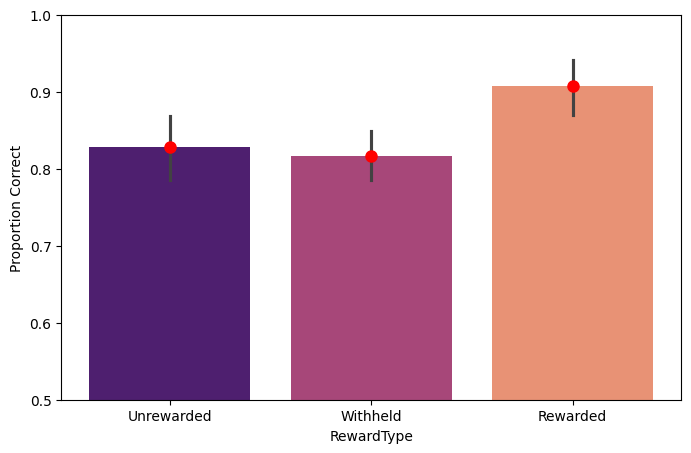

In [ ]:
# Create data sets for rewarded and unrewarded RTs
plt.figure(figsize=(8,5))
ax = sns.barplot(x='RewardType', y='Bacc', hue = 'RewardType',data=Transfer_df_clean_Acc, palette='magma');
#ax.set_xticklabels(['Unrewarded', 'Withheld', 'Rewarded']);
Mns = Transfer_df_clean_Acc.groupby('RewardType')['Bacc'].mean()
# Calculate and plot means
means = Transfer_df_clean_Acc.groupby('RewardType')['Bacc'].mean()

# Reorder means
means = means.reindex(['U', 'W','R'])

for i, mean in enumerate(means):
    ax.plot(i, mean, marker='o', color='red', markersize=8)

ax.set_xticks([0, 1, 2]);
ax.set_xticklabels(["Unrewarded", "Withheld", "Rewarded"])
ax.set_ylabel('Proportion Correct');
plt.ylim(0.5,1);

In [ ]:
# Determine whether normality assumption is valid

#### Assumption 1: Normality
from scipy import stats

#### find the p-value of the Shapiro-Wilks test
w_shapiro_transfer_acc, p_value_shapiro_transfer_acc = stats.shapiro(Transfer_df_clean_Acc['RTMax'])
print('Because the p-value is ', round(p_value_shapiro_transfer_acc,8),"...", sep = '')

if p_value_shapiro_transfer_acc < 0.05:
  print("We reject the null hypothesis that accuracy data are normally distributed.")
else:
  print('We fail the reject the null hypothesis that accuracy data are normally distributed.')

Because the p-value is 0.0...
We reject the null hypothesis that accuracy data are normally distributed.


In [ ]:
# Determine whether homogeneity of variances assumption is valid

#### Assumption 2: Homogeneity of Variance
from scipy.stats import levene
statistic_levenes_transfer_acc, p_value_levenes_transfer_acc = levene( Transfer_df_clean_Acc['Bacc'][Transfer_df_clean_Acc['RewardType']=="U"],
                                                                     Transfer_df_clean_Acc['Bacc'][Transfer_df_clean_Acc['RewardType']=="W"],
                                                                     Transfer_df_clean_Acc['Bacc'][Transfer_df_clean_Acc['RewardType']=="R"]);
#### find the p-value of Levene's test
print('Because the p-value is ', round(p_value_levenes_transfer_acc,4),"...", sep = '')

if p_value_levenes_transfer_acc < 0.05:
  print("We reject the null hypothesis that the population variances are equal between reward types.")
else:
  print('We fail to reject the null hypothesis that the population variances are equal between reward types.')

Because the p-value is 0.0029...
We reject the null hypothesis that the population variances are equal between reward types.


In [ ]:
# Significance testing using one-way ANOVA

from scipy.stats import f_oneway

reward_acc = Transfer_df_clean_Acc['Bacc'][Transfer_df_clean_Acc['RewardType']=="R"]
unreward_acc = Transfer_df_clean_Acc['Bacc'][Transfer_df_clean_Acc['RewardType']=="U"]
withheld_acc = Transfer_df_clean_Acc['Bacc'][Transfer_df_clean_Acc['RewardType']=="W"]

# calculate the p-value using the one-way ANOVA test
anova_f_transfer_acc, anova_p_transfer_acc = f_oneway(reward, unreward, withheld)
print("The F-statistic is ", round(anova_f_transfer_acc,3), " and the p-value is ", round(anova_p_transfer_acc,8),".",sep="")

The F-statistic is 15.988 and the p-value is 1.5e-07.


In [ ]:
# Non-parametric test because data are not normally distributed
#!pip install pingouin
import pingouin as pg

pg.welch_anova(dv='Bacc', between='RewardType', data=Transfer_df_clean_Acc)

# Significant at p < 0.05

,Source,ddof1,ddof2,F,p-unc,np2
0,RewardType,2,648.342854,7.710531,0.00049,0.010454


In [ ]:
# Post-hoc tests and multiple comparison correction
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# perform multiple pairwise comparison (Tukey HSD)
m_comp_acc = pairwise_tukeyhsd(endog = Transfer_df_clean_Acc['Bacc'], groups = Transfer_df_clean_Acc['RewardType'], alpha = 0.05)
print(m_comp_acc)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     R      U   -0.079 0.0256 -0.1504 -0.0077   True
     R      W  -0.0904 0.0025 -0.1539 -0.0269   True
     U      W  -0.0114 0.9004 -0.0726  0.0498  False
----------------------------------------------------


Result: Rewarded chords were performed more accurately than withheld or unrewarded chords.

## Questionnaire

### Reaction Time Data

In [ ]:
# Organize reward effects
All_Rs = Transfer_df_clean_RT[Transfer_df_clean_RT['RewardType']=="R"].groupby(Transfer_df_clean_RT['Subject'])['RTMax'].mean()
All_Us = Transfer_df_clean_RT[Transfer_df_clean_RT['RewardType']=="U"].groupby(Transfer_df_clean_RT['Subject'])['RTMax'].mean()
All_Ws = Transfer_df_clean_RT[Transfer_df_clean_RT['RewardType']=="W"].groupby(Transfer_df_clean_RT['Subject'])['RTMax'].mean()
REffects = (All_Rs - All_Ws) - (All_Us - All_Ws)

In [ ]:
# Organize recall and composite awareness
Only_Q = df_nr[df_nr['Block'] == 14]
cAware_data = Only_Q.groupby(Only_Q['Subject'])['Composite Awareness'].mean()
recall_data = Only_Q.groupby(Only_Q['Subject'])['QRecall'].mean()

Because the p-value is 0.0001172...
We reject the null hypothesis that recall is NOT above chance.


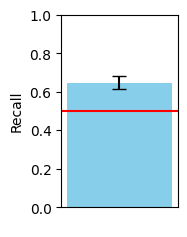

In [ ]:
# Plot recall in relation to chance
plt.figure(figsize=(1.5,2.5))
errors = np.std(recall_data) / np.sqrt(df_nr['Subject'].unique().size)
plt.bar(1,recall_data.mean(), color='skyblue',yerr=errors, capsize=5)
plt.ylabel('Recall');
plt.xlabel(' ');
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.axhline(y = 0.5, color = 'r', linestyle = '-')
plt.ylim(0,1);

# Test if recall is above chance
from scipy import stats

statistic, pvalue = stats.ttest_1samp(recall_data, 0.5, alternative ='greater')
print('Because the p-value is ', round(pvalue,8),"...", sep = '')
if pvalue < 0.05:
  print("We reject the null hypothesis that recall is NOT above chance.")
else:
  print('We fail the reject the null hypothesis that recall is NOT above chance.')

In [ ]:
# Correlations between reward effects, recall, and composite awareness
Q_Data = pd.DataFrame({'Reward Effects': REffects, 'Recall': recall_data, 'Composite Awareness': cAware_data})
Q_Data.corr()

,Reward Effects,Recall,Composite Awareness
Reward Effects,1.000000,0.136818,-0.088838
Recall,0.136818,1.000000,0.395432
Composite Awareness,-0.088838,0.395432,1.000000


In [ ]:
from scipy.stats import pearsonr

pearson_corr, p_value = pearsonr(REffects, recall_data)
print("Recall and reward effect: The Pearson correlation coefficient is ", round(pearson_corr,3), " and the p-value is ", round(p_value,8),".",sep="")

pearson_corr, p_value = pearsonr(REffects, cAware_data)
print("Comoposite awareness and reward effect: The Pearson correlation coefficient is ", round(pearson_corr,3), " and the p-value is ", round(p_value,8),".",sep="")

# Recall was above chance but not associated with reward learning on RT

Recall and reward effect: The Pearson correlation coefficient is 0.137 and the p-value is 0.45525294.
Comoposite awareness and reward effect: The Pearson correlation coefficient is -0.089 and the p-value is 0.62873398.


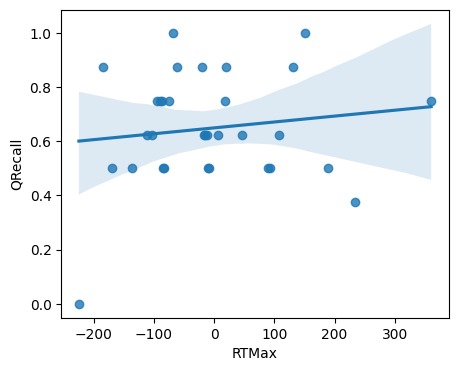

In [ ]:
# Scatter plots - recall
plt.figure(figsize=(5.0,4.0))
sns.regplot(x=REffects, y=recall_data)
plt.show()

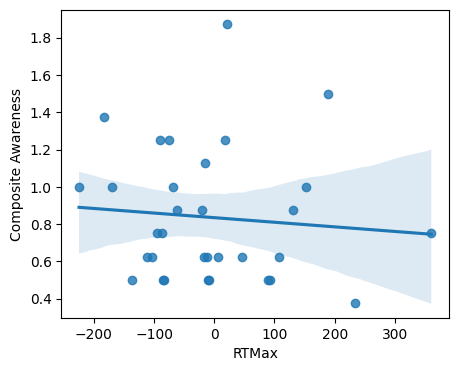

In [ ]:
# Scatter plots - cAware
plt.figure(figsize=(5.0,4.0))
sns.regplot(x=REffects, y=cAware_data)
plt.show()

### Accuracy data

In [ ]:
# Organize reward effects
All_Rs_acc = Transfer_df_clean_Acc[Transfer_df_clean_Acc['RewardType']=="R"].groupby(Transfer_df_clean_Acc['Subject'])['Bacc'].mean()
All_Us_acc = Transfer_df_clean_Acc[Transfer_df_clean_Acc['RewardType']=="U"].groupby(Transfer_df_clean_Acc['Subject'])['Bacc'].mean()
All_Ws_acc = Transfer_df_clean_Acc[Transfer_df_clean_Acc['RewardType']=="W"].groupby(Transfer_df_clean_Acc['Subject'])['Bacc'].mean()
REffects_acc = (All_Rs_acc - All_Ws_acc) - (All_Us_acc - All_Ws_acc)

In [ ]:
# Correlations between reward effects, recall, and composite awareness
Q_Data = pd.DataFrame({'Reward Effects': REffects_acc, 'Recall': recall_data, 'Composite Awareness': cAware_data})
Q_Data.corr()

,Reward Effects,Recall,Composite Awareness
Reward Effects,1.000000,-0.172326,-0.222182
Recall,-0.172326,1.000000,0.395432
Composite Awareness,-0.222182,0.395432,1.000000


In [ ]:
from scipy.stats import pearsonr

pearson_corr, p_value = pearsonr(REffects_acc, recall_data)
print("Recall and reward effect on accuracy: The Pearson correlation coefficient is ", round(pearson_corr,3), " and the p-value is ", round(p_value,8),".",sep="")

pearson_corr, p_value = pearsonr(REffects_acc, cAware_data)
print("Comoposite awareness and reward effect on accuracy: The Pearson correlation coefficient is ", round(pearson_corr,3), " and the p-value is ", round(p_value,8),".",sep="")

# Recall was above chance but not associated with reward learning effects on accuracy

Recall and reward effect on accuracy: The Pearson correlation coefficient is -0.172 and the p-value is 0.34561978.
Comoposite awareness and reward effect on accuracy: The Pearson correlation coefficient is -0.222 and the p-value is 0.22163391.


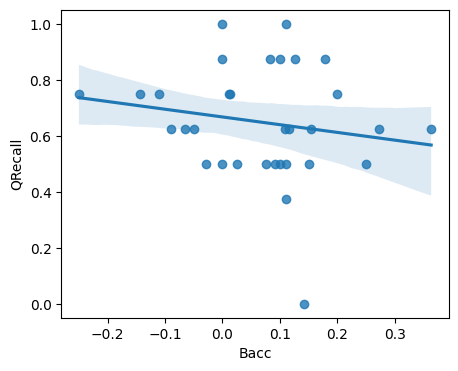

In [ ]:
# Scatter plots - recall
plt.figure(figsize=(5.0,4.0))
sns.regplot(x=REffects_acc, y=recall_data)
plt.show()

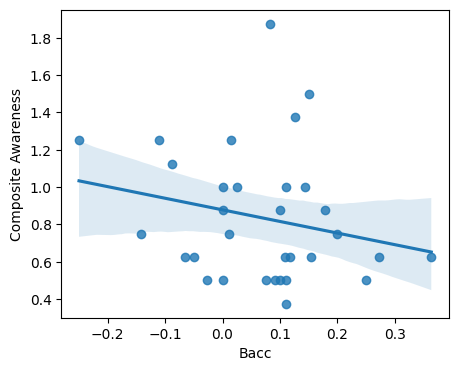

In [ ]:
# Scatter plots - cAware
plt.figure(figsize=(5.0,4.0))
sns.regplot(x=REffects_acc, y=cAware_data)
plt.show()